In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

import result_utils

In [2]:
name_A = 'Luhman 16A'; name_B = 'Luhman 16B'
color_A = '#FF622E'; color_B = '#396ED8'

lw_d = 0.8
lw_m = 1.0

res_alpha = 0.85

path = '/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs'
A = result_utils.RetrievalResults(f'{path}/freechem_K_A_ret_6/test_')
B = result_utils.RetrievalResults(f'{path}/freechem_K_B_ret_6/test_')

/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/freechem_K_A_ret_6/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/freechem_K_A_ret_6/test_.txt
/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/freechem_K_B_ret_6/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/freechem_K_B_ret_6/test_.txt


## Observations

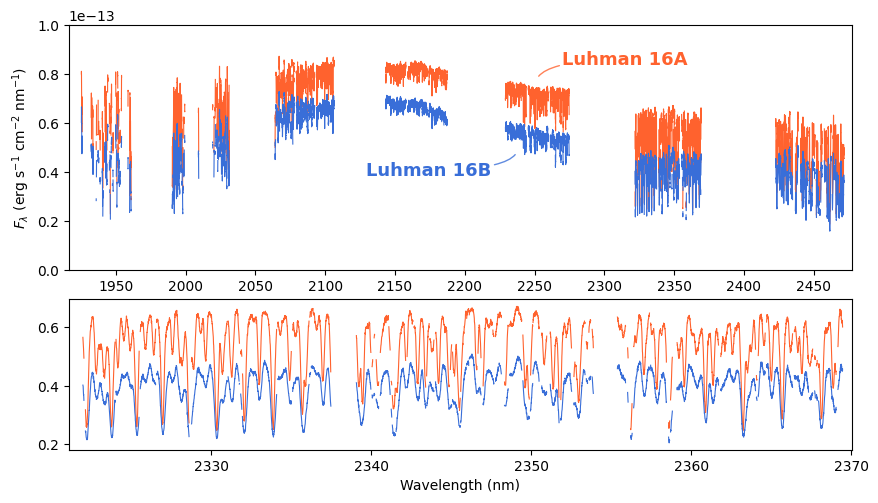

In [3]:
A.load_components(['d_spec'])
B.load_components(['d_spec'])

scale = 1e-13
idx_chips = [15,16,17]

fig = plt.figure(figsize=(9,5))
gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0.15, wspace=0, height_ratios=[0.62,(1-0.62)])
ax = np.array([fig.add_subplot(gs[0,0]), fig.add_subplot(gs[1,0])])

ax[0].plot(A.d_spec['K2166_1'].wave.flatten(), A.d_spec['K2166_1'].flux.flatten(), c=color_A, lw=lw_d)
ax[0].plot(B.d_spec['K2166_1'].wave.flatten(), B.d_spec['K2166_1'].flux.flatten(), c=color_B, lw=lw_d)

ax[1].plot(A.d_spec['K2166_1'].wave[idx_chips].flatten(), A.d_spec['K2166_1'].flux[idx_chips].flatten()/scale, c=color_A, lw=lw_d)
ax[1].plot(B.d_spec['K2166_1'].wave[idx_chips].flatten(), B.d_spec['K2166_1'].flux[idx_chips].flatten()/scale, c=color_B, lw=lw_d)

ax[0].ticklabel_format(axis='y', style='sci', scilimits=(np.log10(scale), np.log10(scale)))
ax[0].set(xticks=np.arange(1900,2500+1,50))
ax[0].set(
    xlim=(B.d_spec['K2166_1'].wave_ranges_chips.min()-5,B.d_spec['K2166_1'].wave_ranges_chips.max()+5), 
    ylim=(0,1e-13), ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$', 
    )
ax[1].set(
    xlim=(B.d_spec['K2166_1'].wave_ranges_chips[idx_chips].min()-0.5, B.d_spec['K2166_1'].wave_ranges_chips[idx_chips].max()+0.5), 
    xlabel=r'Wavelength (nm)'
    )

ax[0].annotate(
    name_A, xy=(0.6,0.79), xytext=(0.63,0.82), xycoords='axes fraction', ha='left', va='bottom', c=color_A, fontsize=13, fontweight='bold',  
    arrowprops={'arrowstyle':'-', 'connectionstyle':'angle3,angleA=0,angleB=50', 'shrinkA':0, 'shrinkB':0, 'lw':1, 'color':color_A, 'alpha':0.8}, 
    )
ax[0].annotate(
    name_B, xy=(0.57,0.47), xytext=(0.54,0.37), xycoords='axes fraction', ha='right', va='bottom', c=color_B, fontsize=13, fontweight='bold',
    arrowprops={'arrowstyle':'-', 'connectionstyle':'angle3,angleA=0,angleB=50','shrinkA':0, 'shrinkB':0, 'lw':1, 'color':color_B, 'alpha':0.8}, 
    )

plt.subplots_adjust(left=0.09, bottom=0.10, top=0.95, right=0.96)
plt.savefig('./plots/K_band_spectrum.pdf')
plt.show()

## Best-fitting model

In [4]:
sigma_A = A.get_mean_scaled_uncertainty(mode='order')
sigma_B = B.get_mean_scaled_uncertainty(mode='order')

A.load_components(['LogLike'])
B.load_components(['LogLike'])

In [13]:
idx_chips = np.arange(A.LogLike.n_chips, dtype=int).reshape(-1,3)
for i, idx in enumerate(idx_chips):

    fig = plt.figure(figsize=(9,3.))
    gs = fig.add_gridspec(nrows=4, ncols=1, hspace=0.0, wspace=0, height_ratios=[(0.85-0.02)/2,(0.85-0.02)/2,0.02,0.15])
    ax = np.array([fig.add_subplot(gs[0,0]), fig.add_subplot(gs[1,0]), fig.add_subplot(gs[3,0])])

    for j in idx:
        mask = np.ones_like(A.d_spec['K2166_1'].flux[j])
        mask[np.isnan(A.d_spec['K2166_1'].flux[j])] = np.nan

        ax[0].plot(A.d_spec['K2166_1'].wave[j], A.d_spec['K2166_1'].flux[j], c='k', lw=lw_d)
        ax[0].plot(A.d_spec['K2166_1'].wave[j], A.LogLike.m_flux_phi[j]*mask, c=color_A, lw=lw_m)

        ax[1].plot(B.d_spec['K2166_1'].wave[j], B.d_spec['K2166_1'].flux[j]/scale, c='k', lw=lw_d)
        ax[1].plot(B.d_spec['K2166_1'].wave[j], B.LogLike.m_flux_phi[j]*mask/scale, c=color_B, lw=lw_m)

        ax[2].plot(B.d_spec['K2166_1'].wave[j], (B.d_spec['K2166_1'].flux[j]-B.LogLike.m_flux_phi[j])*mask/scale, c=color_B, lw=lw_d, alpha=res_alpha)
        ax[2].plot(A.d_spec['K2166_1'].wave[j], (A.d_spec['K2166_1'].flux[j]-A.LogLike.m_flux_phi[j])*mask/scale, c=color_A, lw=lw_d, alpha=res_alpha)
        ax[2].axhline(0.0, c='k', lw=ax[2].spines['left'].get_lw())

    xlim = (
        A.d_spec['K2166_1'].wave_ranges_chips[idx].min()-0.5, 
        A.d_spec['K2166_1'].wave_ranges_chips[idx].max()+0.8
        )

    for j, ax_j in enumerate(ax):
        if j < len(ax)-1:
            # ax_j.set_xticks([])
            ax_j.set_xticklabels([])
            ax_j.tick_params(axis='x', which='both', direction='in')
            ylim = None
        else:
            ylim = (-0.022,0.022)
            
        xticks = (np.round(xlim[0])-2, xlim[1]+5)
        if xticks[0] % 2 != 0:
            xticks = (xticks[0]-1, xticks[1])
        xticks = np.arange(xticks[0], xticks[1], 2)
        ax_j.set_xticks(xticks, minor=True)
        ax_j.set(xlim=xlim, ylim=ylim)

    # Errorbars
    ax[2].errorbar(xlim[1]-0.45, 0, yerr=sigma_A[i]/scale, c=color_A, capsize=2, lw=1.5, capthick=1.5)
    ax[2].errorbar(xlim[1]-0.25, 0, yerr=sigma_B[i]/scale, c=color_B, capsize=2, lw=1.5, capthick=1.5)

    # Axis ticks
    ax[0].ticklabel_format(axis='y', style='sci', scilimits=(np.log10(scale),np.log10(scale)))

    decimals0 = []
    for label_i in ax[0].get_yticklabels():
        if len(label_i.get_text().rsplit('.')) == 1:
            decimals0.append(0)
        else:
            decimals0.append(len(label_i.get_text().rsplit('.')[1]))

    decimals1 = []
    for label_i in ax[1].get_yticklabels():
        if len(label_i.get_text().rsplit('.')) == 1:
            decimals1.append(0)
        else:
            decimals1.append(len(label_i.get_text().rsplit('.')[1]))

    decimals = max([*decimals0,*decimals1])
    decimals = max([*decimals0])

    ax[1].yaxis.set_major_formatter(FormatStrFormatter(r'$%.'+str(decimals)+'f$'))
    ax[-1].yaxis.set_major_formatter(FormatStrFormatter(r'$%.2f$'))

    # Labels
    ha='left'; xy=(0.017,0.05)
    if i in [1,2,5]:
        ha='right'; xy=(1-0.017,0.05)
    if i in [1,5]:
        ha='center'; xy=(0.5,0.05)
    ax[0].annotate(
        name_A, xy=xy, xycoords='axes fraction', ha=ha, va='bottom', c=color_A, fontsize=13, 
        fontweight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
        )
    ax[1].annotate(
        name_B, xy=xy, xycoords='axes fraction', ha=ha, va='bottom', c=color_B, fontsize=13, 
        fontweight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
        )

    # Axis labels
    ax[0].set_ylabel(r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$', y=0)
    ax[-1].set(xlabel=r'Wavelength (nm)', ylabel='Residuals')

    #plt.subplots_adjust(left=0.09, bottom=0.12, top=0.94, right=0.98)
    plt.subplots_adjust(left=0.09, bottom=0.15, top=0.93, right=0.98)
    plt.savefig(f'./plots/K_band_spectrum_bestfit_order{i}.pdf')
    #plt.show()
    plt.close()

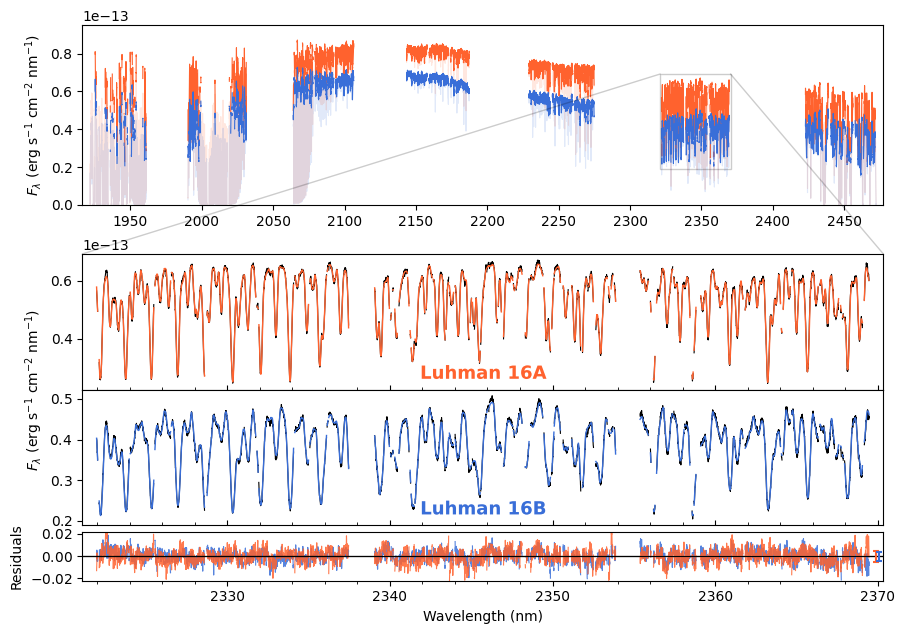

In [14]:
height_ratios = [0.55,0.15,(0.85-0.02)/2,(0.85-0.02)/2,0.02,0.15]

fig = plt.figure(figsize=(9,np.sum(height_ratios)/np.sum(height_ratios[2:])*3.8))
gs = fig.add_gridspec(nrows=6, ncols=1, hspace=0.0, wspace=0, height_ratios=height_ratios)
ax = np.array([fig.add_subplot(gs[2,0]), fig.add_subplot(gs[3,0]), fig.add_subplot(gs[5,0])])

i, idx = 5, idx_chips[5]

for j in idx:
    mask = np.ones_like(A.d_spec['K2166_1'].flux[j])
    mask[np.isnan(A.d_spec['K2166_1'].flux[j])] = np.nan

    ax[0].plot(A.d_spec['K2166_1'].wave[j], A.d_spec['K2166_1'].flux[j], c='k', lw=lw_d)
    ax[0].plot(A.d_spec['K2166_1'].wave[j], A.LogLike.m_flux_phi[j]*mask, c=color_A, lw=lw_m)

    ax[1].plot(B.d_spec['K2166_1'].wave[j], B.d_spec['K2166_1'].flux[j]/scale, c='k', lw=lw_d)
    ax[1].plot(B.d_spec['K2166_1'].wave[j], B.LogLike.m_flux_phi[j]*mask/scale, c=color_B, lw=lw_m)

    ax[2].plot(B.d_spec['K2166_1'].wave[j], (B.d_spec['K2166_1'].flux[j]-B.LogLike.m_flux_phi[j])*mask/scale, c=color_B, lw=lw_d, alpha=res_alpha)
    ax[2].plot(A.d_spec['K2166_1'].wave[j], (A.d_spec['K2166_1'].flux[j]-A.LogLike.m_flux_phi[j])*mask/scale, c=color_A, lw=lw_d, alpha=res_alpha)
    ax[2].axhline(0.0, c='k', lw=ax[2].spines['left'].get_lw())

xlim = (
    A.d_spec['K2166_1'].wave_ranges_chips[idx].min()-0.5, 
    A.d_spec['K2166_1'].wave_ranges_chips[idx].max()+0.8
    )

for j, ax_j in enumerate(ax):
    if j < len(ax)-1:
        # ax_j.set_xticks([])
        ax_j.set_xticklabels([])
        ax_j.tick_params(axis='x', which='both', direction='in')
        ylim = None
    else:
        ylim = (-0.022,0.022)
    
    xticks = (np.round(xlim[0])-2, xlim[1]+5)
    if xticks[0] % 2 != 0:
        xticks = (xticks[0]-1, xticks[1])
    xticks = np.arange(xticks[0], xticks[1], 2)
    ax_j.set_xticks(xticks, minor=True)
    ax_j.set(xlim=xlim, ylim=ylim)

# Errorbars
ax[2].errorbar(xlim[1]-0.45, 0, yerr=sigma_A[i]/scale, c=color_A, capsize=2, lw=1.5, capthick=1.5)
ax[2].errorbar(xlim[1]-0.25, 0, yerr=sigma_B[i]/scale, c=color_B, capsize=2, lw=1.5, capthick=1.5)

# Axis ticks
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(np.log10(scale),np.log10(scale)))

decimals0 = []
for label_i in ax[0].get_yticklabels():
    if len(label_i.get_text().rsplit('.')) == 1:
        decimals0.append(0)
    else:
        decimals0.append(len(label_i.get_text().rsplit('.')[1]))

decimals1 = []
for label_i in ax[1].get_yticklabels():
    if len(label_i.get_text().rsplit('.')) == 1:
        decimals1.append(0)
    else:
        decimals1.append(len(label_i.get_text().rsplit('.')[1]))

decimals = max([*decimals0,*decimals1])
decimals = max([*decimals0])

ax[1].yaxis.set_major_formatter(FormatStrFormatter(r'$%.'+str(decimals)+'f$'))
ax[-1].yaxis.set_major_formatter(FormatStrFormatter(r'$%.2f$'))

# Labels
ha='left'; xy=(0.017,0.05)
if i in [1,2]:
    ha='right'; xy=(1-0.017,0.05)
if i in [5]:
    ha='center'; xy=(0.5,0.05)
ax[0].annotate(
    name_A, xy=xy, xycoords='axes fraction', ha=ha, va='bottom', c=color_A, fontsize=13, 
    fontweight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
    )
ax[1].annotate(
    name_B, xy=xy, xycoords='axes fraction', ha=ha, va='bottom', c=color_B, fontsize=13, 
    fontweight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
    )

# Axis labels
ax[0].set_ylabel(r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$', y=0)
ax[-1].set(xlabel=r'Wavelength (nm)', ylabel='Residuals')

# Full spectrum
ax_full = fig.add_subplot(gs[0,0])
ax_full.plot(A.d_spec['K2166_1'].wave.flatten(), A.d_spec['K2166_1'].flux.flatten(), c=color_A, lw=lw_d)
ax_full.plot(A.d_spec['K2166_1'].wave.flatten(), A.d_spec['K2166_1'].uncorrected_flux.flatten(), c=color_A, lw=lw_d, alpha=0.15)
ax_full.plot(B.d_spec['K2166_1'].wave.flatten(), B.d_spec['K2166_1'].flux.flatten(), c=color_B, lw=lw_d)
ax_full.plot(B.d_spec['K2166_1'].wave.flatten(), B.d_spec['K2166_1'].uncorrected_flux.flatten(), c=color_B, lw=lw_d, alpha=0.15)

ax_full.ticklabel_format(axis='y', style='sci', scilimits=(np.log10(1e-13), np.log10(1e-13)))
ax_full.set(xticks=np.arange(1900,2500+1,50))
ax_full.set(
    xlim=(B.d_spec['K2166_1'].wave_ranges_chips.min()-5,B.d_spec['K2166_1'].wave_ranges_chips.max()+5), 
    ylim=(0,9.5e-14), yticks=1e-13*np.arange(0,1,0.2), 
    ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$', #yticks=1e-13*np.arange(0,1,0.2)
    )

# Indicate zoom-in
bounds = (xlim[0], ax[1].get_ylim()[0]*scale, np.diff(xlim)[0], ax[0].get_ylim()[1]-ax[1].get_ylim()[0]*scale)
_, con_patch = ax_full.indicate_inset(bounds=bounds, inset_ax=ax[0], edgecolor='k', alpha=0.2)

plt.subplots_adjust(left=0.09, bottom=0.09, top=0.95, right=0.98)
plt.savefig(f'./plots/K_band_spectrum_bestfit_order{i}.pdf')

plt.show()
plt.close()